### Append Path

In [13]:
import sys

sys.path.append("..")

%reload_ext autoreload
%autoreload 2

### Load Data

In [14]:
import pandas as pd

df = pd.read_csv("../data/processed/feature_engineered_data.csv")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18296\3085591209.py:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/processed/feature_engineered_data.csv")


### Train Test Split

In [15]:
from src.modeling import split_data

X_train, X_test, y_train, y_test = split_data(
    df, target_col="SolarGeneration", test_size=0.2
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (567672, 27)
X_test shape: (141918, 27)


### Model Training

In [16]:
from src.modeling import train_model

model = train_model(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits

Best Params: {'subsample_freq': 1, 'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'num_leaves': 63, 'n_estimators': 500, 'min_child_samples': 20, 'max_depth': 15, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best CV R2 Score: 0.8008

Training Complete.


### Model Evaluation

In [17]:
from src.modeling import evaluate_model

preds = evaluate_model(model, X_test, y_test)

MAE (Mean Absolute Error): 2.4409 kWh
RMSE (Root Mean Sq Error): 4.9064 kWh
R2 Score: 0.8143


### Visualization

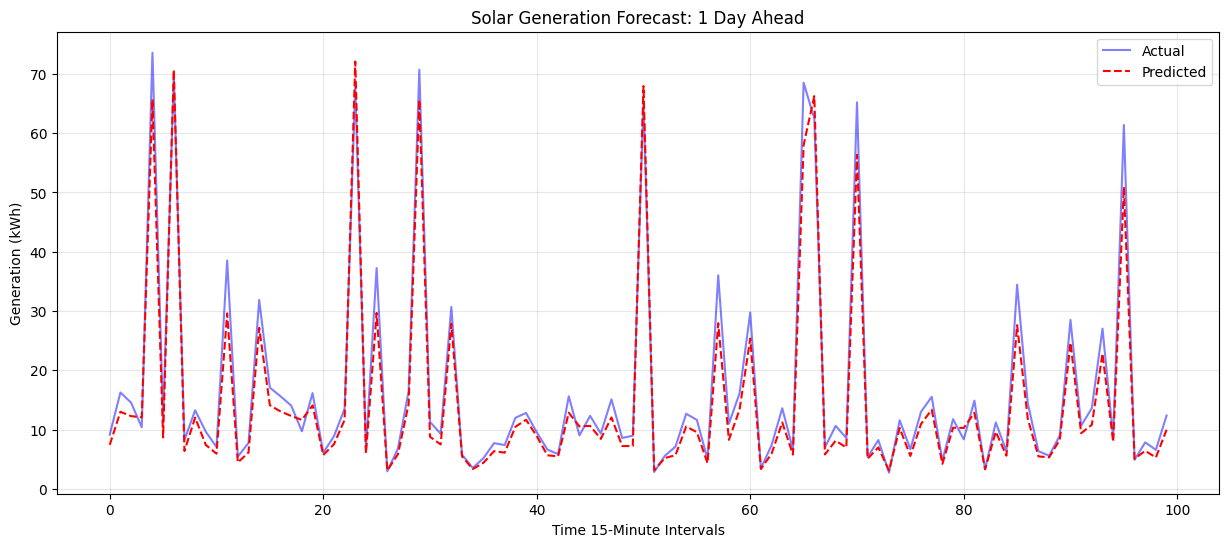

In [18]:
import matplotlib.pyplot as plt

results = pd.DataFrame({"Actual": y_test, "Predicted": preds})

plt.figure(figsize=(15, 6))
plt.plot(results["Actual"].values[:100], label="Actual", color="blue", alpha=0.5)
plt.plot(
    results["Predicted"].values[:100], label="Predicted", color="red", linestyle="--"
)
plt.title("Solar Generation Forecast: 1 Day Ahead")
plt.xlabel("Time 15-Minute Intervals")
plt.ylabel("Generation (kWh)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Feature Importance

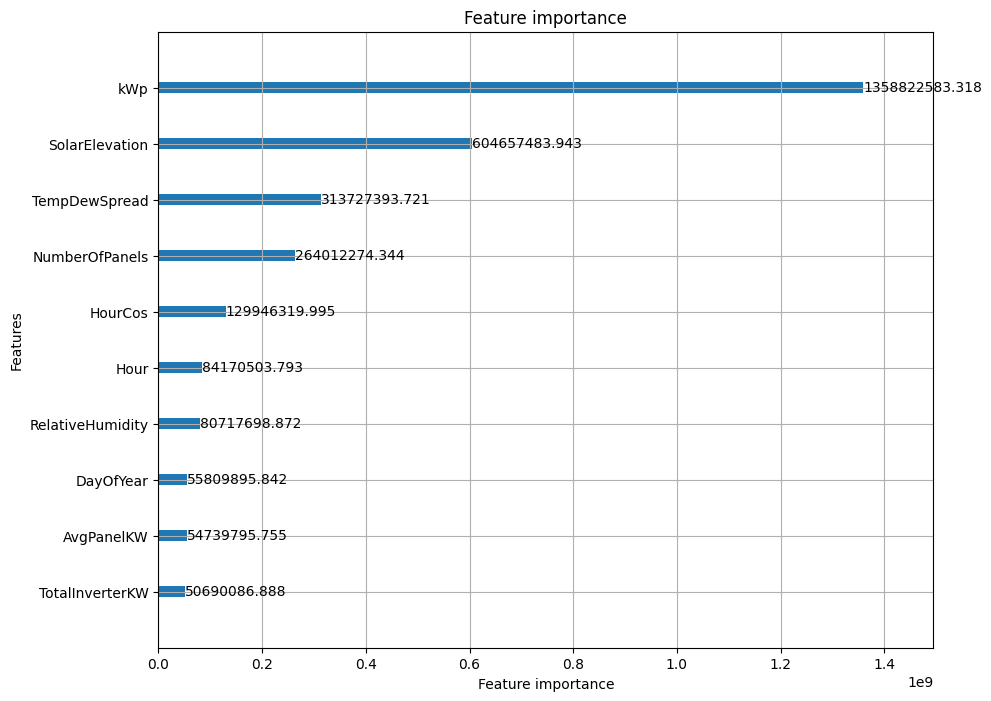

In [19]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(model, ax=ax, max_num_features=10)
plt.show()

### Save Model

In [20]:
from src.modeling import save_model

save_model(model, "../models/solar_lightgbm.pkl")

Model saved to ../models/solar_lightgbm.pkl
